In [5]:
# install.packages('car')
# install.packages('ggplot2')
# install.packages('nortest')

In [6]:
library(ggplot2)
# library(car)
# library(nortest)

In [7]:
# get current working directory
current_wd <- getwd()
print(current_wd)

[1] "/mnt/d/VNU/spring2025/stats_model_2/lecture_note"


In [8]:
# get the data
data <- read.csv('../data/CH2-02.csv', header=TRUE, sep=';')

In [9]:
str(data)

'data.frame':	20 obs. of  2 variables:
 $ Treatment: num  4.81 4.17 4.41 3.59 5.87 3.83 6.03 4.98 4.9 5.75 ...
 $ Control  : num  4.17 3.05 5.18 4.01 6.11 4.1 7.17 3.57 5.33 5.59 ...


In [10]:
treatment_group = data$Treatment
control_group = data$Control

#### Question a:

##### Calculation part:

**Calculate the mean**

In [11]:
treatment_mean = mean(data$Treatment, na.rm = TRUE) # remove nulls values in calculation
control_mean = mean(data$Control, na.rm = TRUE)

In [12]:
print(paste('The mean value of treatment group is: ', treatment_mean))
print(paste('The mean value of control group is: ', control_mean))

[1] "The mean value of treatment group is:  4.86"
[1] "The mean value of control group is:  4.8265"


**Calculate the median**

In [13]:
treatment_median <- median(data$Treatment, na.rm = TRUE) # remove nulls values in calculation
control_median <- median(data$Control, na.rm = TRUE)

In [14]:
cat('The median value of treatment group is: ', treatment_median)
cat('The median value of control group is: ', control_median)

The median value of treatment group is:  4.85The median value of control group is:  4.635

**Calculate the standard deviation**

In [15]:
treatment_sd = sd(data$Treatment, na.rm = TRUE) # remove nulls values in calculation
control_sd = sd(data$Control, na.rm = TRUE)

In [16]:
cat('The standard deviation value of treatment group is: ', treatment_sd)
cat('The standard deviation value of control group is: ', control_sd)

The standard deviation value of treatment group is:  0.7909222The standard deviation value of control group is:  1.019336

**Calculate the max, and min**

In [17]:
treatment_max = max(data$Treatment, na.rm = TRUE) # remove nulls values in calculation
control_max = max(data$Control, na.rm = TRUE)

In [18]:
cat('The max value of treatment group is: ', treatment_max)
cat('The max value of control group is: ', control_max)

The max value of treatment group is:  6.34The max value of control group is:  7.17

In [19]:
treatment_min = min(data$Treatment, na.rm = TRUE) # remove nulls values in calculation
control_min = min(data$Control, na.rm = TRUE)

In [20]:
cat('The min value of treatment group is: ', treatment_min)
cat('The min value of control group is: ', control_min)

The min value of treatment group is:  3.48The min value of control group is:  3.05

##### Generate the visualisation part:

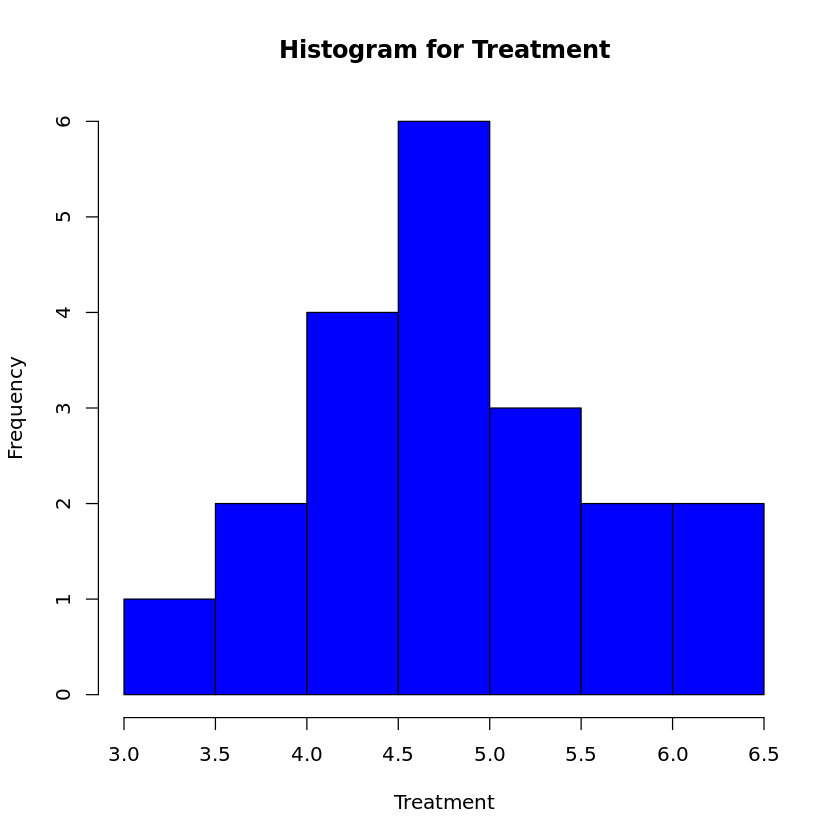

In [21]:
hist(data$Treatment, main = "Histogram for Treatment", xlab = "Treatment", col = "blue", border = "black")

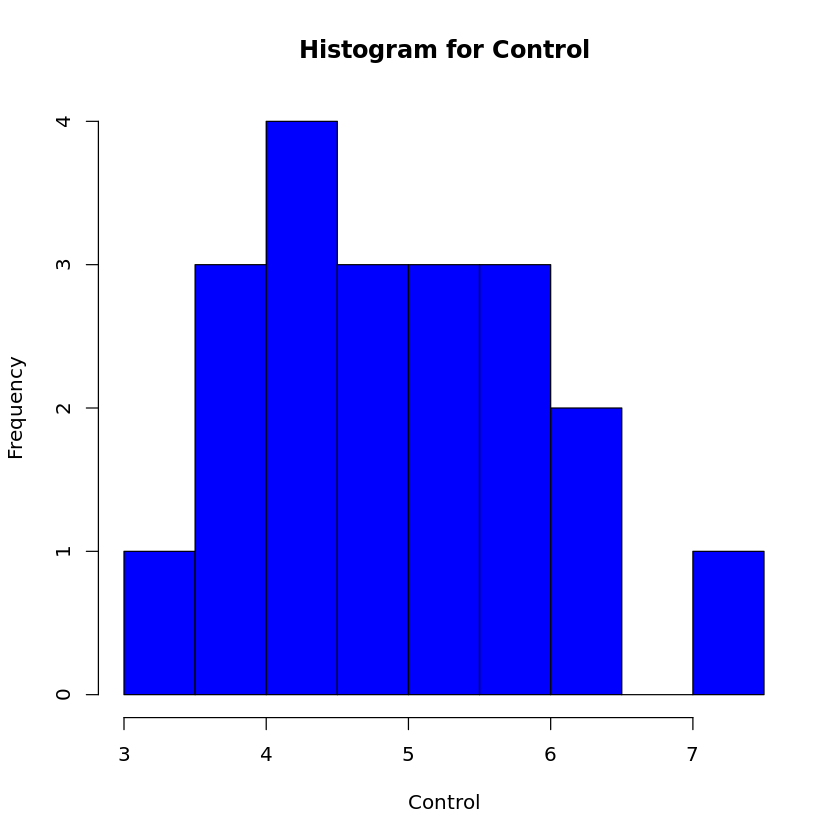

In [22]:
hist(data$Control, main = "Histogram for Control", xlab = "Control", col = "blue", border = "black")

#### Question b

In [23]:
test_result = t.test(treatment_group, control_group, alternative="two.sided", var.equal=FALSE)
test_result


	Welch Two Sample t-test

data:  treatment_group and control_group
t = 0.11612, df = 35.792, p-value = 0.9082
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.5517161  0.6187161
sample estimates:
mean of x mean of y 
   4.8600    4.8265 


#### Question g

In [24]:
mean_control <- mean(control_group)
mean_treatment <- mean(treatment_group)
overall_mean <- mean(c(control_group, treatment_group))

In [25]:
S0 <- sum((control_group - overall_mean)^2) + sum((treatment_group - overall_mean)^2)
S1 <- sum((control_group - mean_control)^2) + sum((treatment_group - mean_treatment)^2)

In [26]:
F_stat <- (S0 - S1) / (S1 / 38)

In [27]:
p_value <- 1 - pf(F_stat, df1 = 1, df2 = 38)

In [28]:
cat("F-statistic:", F_stat, "\n")
cat("p-value:", p_value, "\n")

F-statistic: 0.0134837 
p-value: 0.9081695 


#### Question i

In [33]:
residuals_H0 <- c(data$Control - overall_mean, data$Treatment - overall_mean)
residuals_H0

[1] -0.67325 -1.79325  0.33675 -0.83325  1.26675 -0.74325  2.32675 -1.27325
 [9]  0.48675  0.74675 -0.18325  0.73675 -1.18325 -0.34325 -0.94325 -0.23325
[17]  0.77675 -0.31325  1.20675  0.29675 -0.03325 -0.67325 -0.43325 -1.25325
[25]  1.02675 -1.01325  1.18675  0.13675  0.05675  0.90675  0.51675 -1.36325
[33] -0.15325 -0.40325  0.04675 -0.13325  0.63675 -0.52325  0.30675  1.49675

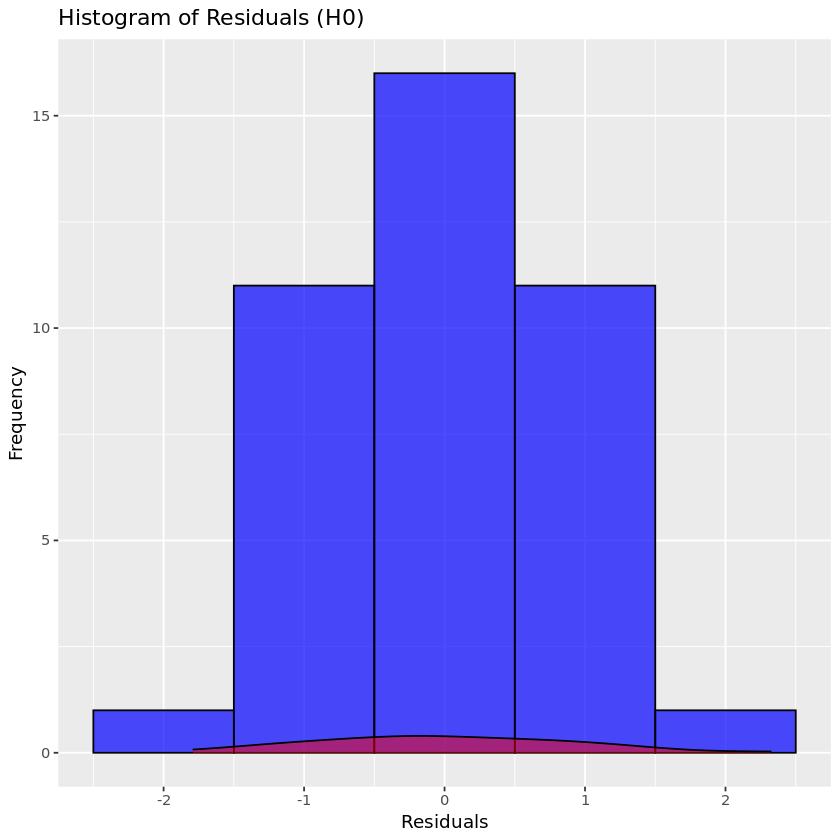

In [30]:
ggplot(data.frame(residuals_H0), aes(x = residuals_H0)) +
  geom_histogram(binwidth = 1, fill = "blue", color = "black", alpha = 0.7) +
  geom_density(alpha = 0.5, fill = "red") +
  ggtitle("Histogram of Residuals (H0)") +
  xlab("Residuals") +
  ylab("Frequency")

In [32]:
# Perform Shapiro-Wilk normality test
shapiro_test <- shapiro.test(residuals_H0)
print(shapiro_test)


	Shapiro-Wilk normality test

data:  residuals_H0
W = 0.98922, p-value = 0.9637

